Effect of pooling samples on the efficiency of comparative studies using microarrays
https://academic.oup.com/bioinformatics/article/21/24/4378/180078

In [1]:
from pathlib import Path
inpD = Path.cwd()
print(inpD)
inpF="proteinGroups.txt"
Path.exists(inpD/inpF)

/mnt/f/GD/notebooks


True

In [2]:
import pandas as pd
df = pd.read_table(inpD/inpF)
df.describe()

,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Peptides 1_TK9_ctr1,Peptides 10_TK9_combi_1,Peptides 11_TK9_combi_2,Peptides 12_TK9_combi_3,Peptides 13_TK9_ctr_poolet,Peptides 14_TK9_apim_poolet,...,MS/MS count 2_TK9_ctr2,MS/MS count 3_TK9_ctr3,MS/MS count 4_TK9_apim1,MS/MS count 5_TK9_apim_2,MS/MS count 6_TK9_apim_3,MS/MS count 7_TK9_mel_1,MS/MS count 8_TK9_mel_2,MS/MS count 9_TK9_mel_3,MS/MS count,id
count,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,...,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000
mean,4.877132,6.719283,6.064759,5.531078,5.307314,5.090199,5.637178,4.636022,4.185892,4.901706,...,3.647297,2.129228,3.229257,2.794449,2.292570,3.470656,2.975716,2.764672,46.131252,1729.000000
std,4.543498,12.373436,10.671680,9.251849,10.517967,10.196903,11.084116,9.400613,8.864174,10.207117,...,9.656592,6.163176,8.554172,7.351083,6.739384,9.014027,8.271177,7.435989,123.081845,998.671618
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,864.500000
50%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1729.000000
75%,6.000000,8.000000,7.000000,6.000000,6.000000,6.000000,6.500000,5.000000,5.000000,6.000000,...,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,44.000000,2593.500000
max,40.000000,324.000000,324.000000,324.000000,283.000000,269.000000,292.000000,260.000000,215.000000,285.000000,...,303.000000,200.000000,246.000000,234.000000,229.000000,274.000000,259.000000,218.000000,3903.000000,3458.000000


In [26]:
df["Uniprot"]= df["Protein IDs"].str.split(';').str[0]

In [27]:
df["Uniprot"]

0          A0A024QZ33
1          A0A1B0GWH8
2          A0A024QZP7
3          A0A024R4E5
4          A0A087WZA9
            ...      
3454    REV__Q9C0G6-4
3455    REV__Q9NXC5-2
3456      REV__Q9ULE4
3457           S4R3H4
3458           U3KQF5
Name: Uniprot, Length: 3459, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f135168ab90>,
      dtype=object)

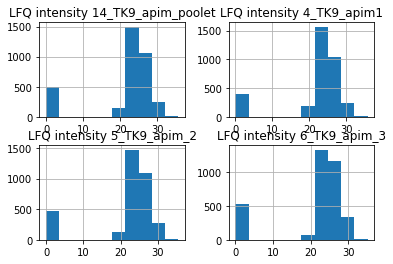

In [28]:
import numpy as np
dfLFQ=df.loc[:, df.columns.str.startswith('LFQ')&df.columns.str.contains('pim')]
#df['Ratio H/L normalized 161205_1_19913'].apply(np.log2).hist()
(dfLFQ+1).apply(np.log2).hist()

In [29]:
dfLFQ=dfLFQ.rename(columns = lambda x : str(x)[21:])
print(dfLFQ.columns)

Index(['apim_poolet', 'pim1', 'pim_2', 'pim_3'], dtype='object')


In [30]:
from ipywidgets import interact, interactive, fixed, interact_manual
sample=dfLFQ.columns
def select_subject(subID):
    df_filtered= dfLFQ[subID]
    ax = (df_filtered+1).apply(np.log2).hist(color="orange")
interact(select_subject,subID=sample)

interactive(children=(Dropdown(description='subID', options=('apim_poolet', 'pim1', 'pim_2', 'pim_3'), value='…

<function __main__.select_subject(subID)>

In [31]:
dfLFQ.iloc[[42]]

,apim_poolet,pim1,pim_2,pim_3
42,2688700,0,0,0


In [34]:
df_filtered=dfLFQ[df['Uniprot']=="A0A024QZ33"]
df_filtered#.apply(np.log2).transpose()#.hist(color="red")

,apim_poolet,pim1,pim_2,pim_3
0,0,4033700,0,4488500


In [35]:
dfLFQlog2=np.log2(dfLFQ+1)

In [36]:
import ipyvolume as ipv
import numpy as np
ipv.quickscatter(dfLFQlog2['pim1'],dfLFQlog2['pim_2'],dfLFQlog2['pim_3'], color="orange",size=1, marker="sphere")

In [47]:
import matplotlib
c = matplotlib.cm.afmhot(np.linspace(0, 1, len(dfLFQlog2['apim_poolet'])))
ipv.quickscatter(dfLFQlog2['pim1'],dfLFQlog2['pim_2'],dfLFQlog2['pim_3'], color=c,size=1, marker="sphere")

In [52]:
#https://github.com/willkurt/ProbAndStats-PyDataNYC2019/blob/master/notebooks/Part%203%20-%20Linear%20Models%20and%20PyMC3.ipynb
import pymc3 as pm
import arviz as az
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.special import expit as logistic

In [ ]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('apim_poolet ~ 1 + pim1 + pim_2 + pim_3',
                            dfLFQlog2,
                            family=pm.glm.families.Binomial())
    ab_trace = pm.sample(1000, tune=1000, init='adapt_diag',chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [pim_3, pim_2, pim1, Intercept]
Sampling 2 chains, 0 divergences:   0%|          | 0/4000 [00:00<?, ?draws/s]/home/animeshs/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [ ]:
pm.traceplot(ab_trace)

In [ ]:
ab_trace.get_values('Intercept')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
outcome_label = np.where(df_filtered_log2_TIT[labelN] == 'T', 1, 0)
outcome_label.sum()

In [ ]:
features = df_filtered_log2_TIT.columns[5:]
features

In [ ]:
lym_clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
lym_clf.fit(df_filtered_log2_TIT[features], outcome_label)

In [ ]:
lym_clf.feature_importances_
feat_importances = pd.Series(lym_clf.feature_importances_, index=df_filtered_log2_TIT.columns[5:])
feat_importances#.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9,5))
feat_importances.nlargest(10).plot(kind='barh', color='black')
plt.title("Feature importance")
plt.ylabel("Measured feature")
plt.xlabel("importance score")
#https://www.uniprot.org/uniprot/Q96KP4

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
train_labels = df_filtered_log2_TIT[labelN].unique()
def select_tree(tree):
    estimator = lym_clf.estimators_[tree]
    export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = train_labels,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
from sklearn.tree import export_graphviz
train_labels = df_filtered_log2_TIT[labelN].unique()
## randomly chose tree-9 to plot
estimator = lym_clf.estimators_[100]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = train_labels,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
tree = len(lym_clf.estimators_)-1
#tree
interact(select_tree, tree=tree)
from IPython.display import Image
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

In [ ]:
#import seaborn as sb
#sbp=sb.pairplot(df_filtered_log2,hue=labelN)

In [ ]:
import seaborn as sb
def select_uniprot(protID1,protID2,lab):
    #ax = sb.pointplot(protID1,protID2,hue=lab,join=False,dodge=True, data=df_filtered_log2)
    ax = sb.scatterplot(protID1,protID2,hue=lab,alpha=0.5,data=df_filtered_log2)
uniprot1 = df_filtered_log2.columns
uniprot2 = df_filtered_log2.columns
label = df_filtered_log2.columns
interact(select_uniprot, protID1=uniprot1, protID2=uniprot2,lab=label)

In [ ]:
#sbp.savefig(home/inpD/".".join([protn,labelN,"output.svg"]))
uniprot2='O95396'
#uniprot2='G3V1B8;H0YEB6;O60232;E9PN57;H0YEK1'
#uniprot2='P17066;P48741'
#uniprot2='A0A087X0I3;B4E3Q4;Q9NZK5'
uniprot1='Q9H2P9'
#uniprot2='Q9H2P9'
#ax = sb.pointplot(uniprot1,uniprot2,hue=labelN,join=False,dodge=True, data=df_filtered_log2)
ax = sb.lmplot(uniprot1,uniprot2, x_jitter=1, y_jitter=1,hue=labelN,scatter_kws={'s':6},height=8.27, aspect=11.7/8.27,data=df_filtered_log2)
fig = ax#.get_figure() 
fig.savefig(home/inpD/".".join([uniprot1,uniprot2,labelN,ratio,"output.svg"]))

In [ ]:
df_filtered_log2.describe(include='all').T

In [ ]:
#https://nbviewer.jupyter.org/github/noklam/SHAP_Exploration/blob/master/Tree%20model%20interpreation%20with%20SHAP.ipynb
#!pip install git+https://github.com/fastai/fastai

In [ ]:
!pip install fastai==0.7.0  #https://forums.fast.ai/t/no-module-named-fastai-structured-google-colab/23820/2

In [ ]:
import torch
Device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(Device)
print(Device)

In [ ]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [ ]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_, 'std':np.std([tree.feature_importances_ for tree in m.estimators_],axis=0)}).sort_values('imp', ascending=False)

In [ ]:
def plot_fi(fi,std=True, feature_importance_type=''):
    if std: 
        ax = fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False, xerr='std')
    else:
        ax = fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
    ax.set_xlabel(f"{feature_importance_type} Feature Importance")
    return ax

In [ ]:
from sklearn import preprocessing
preprocessing.LabelEncoder().fit_transform(df_filtered_log2['Group27'])

In [ ]:
#set_rf_samples(5)
m = RandomForestClassifier()#n_estimators=3, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
X_train, y_train = df_filtered.filter(regex=('|'.join(protN))).fillna(1).apply(np.log2), preprocessing.LabelEncoder().fit_transform(df_filtered_log2['Group27'])
m.fit(X_train, y_train )

In [ ]:
X_valid=X_train
y_valid=y_train
print_score(m)

In [ ]:
n = 3
sample_idx = np.random.permutation(len(X_valid))[:n]
X_valid_sample = X_valid.iloc[sample_idx].copy()
y_valid_sample = y_valid[sample_idx].copy()
X_valid_sample.shape, y_valid_sample.shape

In [ ]:
fi_sklearn = rf_feat_importance(m, X_valid_sample); fi_sklearn[:10]

In [ ]:
plot_fi(fi_sklearn[:],False, 'Sklearn');

In [ ]:
!pip install rfpimp

In [ ]:
from rfpimp import importances
fi_permutation = importances(m, X_valid_sample, y_valid_sample) # permutation

In [ ]:
fi_permutation.sum()

In [ ]:
fi_permutation['Importance'] = fi_permutation['Importance']/ fi_permutation['Importance'].sum()

In [ ]:
fi_permutation = (fi_permutation
                  .reset_index()
                  .rename({'Feature':'cols', 'Importance':'imp'},axis=1))

In [ ]:
plot_fi(fi_permutation[:],False,'Permutation')

In [ ]:
explainer = shap.TreeExplainer(m)
shap_values = explainer.shap_values(X_valid_sample.values.astype(int))
explainer.expected_value

In [ ]:
%%perl
open(F,"proteinGroupsSILACmedianInverted.txt");
while(<F>){$cnt++;
    if($cnt<10){print join(",",split(/\t/,$_))}
}